In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


170498071/170498071 [==============================] - 40s 0us/step
Epoch 1/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.4532 - accuracy: 0.4784 - val_loss: 1.2238 - val_accuracy: 0.5611
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.1053 - accuracy: 0.6113 - val_loss: 1.0494 - val_accuracy: 0.6306
Epoch 3/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9704 - accuracy: 0.6612 - val_loss: 0.9920 - val_accuracy: 0.6523
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.8711 - accuracy: 0.6967 - val_loss: 0.9612 - val_accuracy: 0.6646
Epoch 5/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7807 - accuracy: 0.7272 - val_loss: 0.9108 - val_accuracy: 0.6881
Epoch 6/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7126 - accuracy: 0.7516 - val_loss: 0.9169 - val_accuracy: 0.6938
Epoch 7/10
1250/1250 [==============================] - 

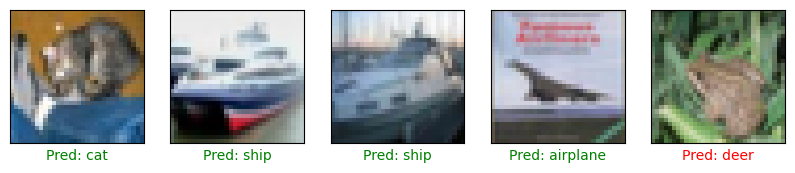

In [2]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
x_train, x_test, x_val = x_train / 255.0, x_test / 255.0, x_val / 255.0

# Create a list of class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10 epochs
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Predict labels for test set
predictions = model.predict(x_test)

# Show some test images with their predicted labels
num_images = 5  # Number of images to display
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.grid(False)  # Hide gridlines
    plt.imshow(x_test[i])  # Show test image

    # Get predicted label for the image
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i][0]

    # Set color to green for correct prediction, red for incorrect prediction
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f'Pred: {class_names[predicted_label]}', color=color)  # Display predicted label
plt.show()